In [1]:
import pandas as pd
import numpy as np

In [7]:
yearly_summary=pd.read_csv('yearly_summary(1).csv')
althete_progarams=pd.read_csv('summerOly_athletes.csv')
medals= pd.read_csv('summerOly_medal_counts.csv')
team_to_noc = althete_progarams.set_index('Team')['NOC'].to_dict()
medals['NOC'] = medals['NOC'].map(team_to_noc)
althete_progarams[althete_progarams['Sport']== 'Volleyball']

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
222,Mahmoud El-kader,M,Egypt,EGY,2008,Beijing,Volleyball,Volleyball Men's Volleyball,No medal
230,Hossam Abdalla,M,Egypt,EGY,2016,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,No medal
249,Mahmoud Aziz,M,Egypt,EGY,2000,Sydney,Volleyball,Volleyball Men's Volleyball,No medal
273,Mohamed Hamed,M,Egypt,EGY,1984,Los Angeles,Volleyball,Volleyball Men's Volleyball,No medal
296,Ahmed Naeim,M,Egypt,EGY,2008,Beijing,Volleyball,Volleyball Men's Volleyball,No medal
...,...,...,...,...,...,...,...,...,...
252301,Saso Stalekar,M,Slovenia,SLO,2024,Paris,Volleyball,Men,No medal
252308,Tine Urnaut,M,Slovenia,SLO,2024,Paris,Volleyball,Men,No medal
252312,Toncek Stern,M,Slovenia,SLO,2024,Paris,Volleyball,Men,No medal
252316,Uros Planinsic,M,Slovenia,SLO,2024,Paris,Volleyball,Men,No medal


In [8]:
medal_summary = (
    althete_progarams
    .groupby(['Year', 'NOC', 'Event', 'Medal'])
    .size()
    .reset_index(name='Count')  # 添加统计列
)

# 2. 将 Medal 的值展开为列（透视表）
medal_summary_pivot = medal_summary.pivot_table(
    index=['Year', 'NOC', 'Event'],  # 按这些列分组
    columns='Medal',                # 将 Medal 的值展开为列
    values='Count',                 # 填充的是 Count 列
    aggfunc='sum',                  # 如果有重复值，取总和
    fill_value=0                    # 缺失值填充为 0
).reset_index()

# 3. 检查结果
print(medal_summary_pivot.head())

Medal  Year  NOC                         Event  Bronze  Gold  No medal  Silver
0      1896  AUS  Athletics Men's 1,500 metres       0     1         0       0
1      1896  AUS    Athletics Men's 800 metres       0     1         0       0
2      1896  AUS      Athletics Men's Marathon       0     0         1       0
3      1896  AUS          Tennis Men's Doubles       1     0         0       0
4      1896  AUS          Tennis Men's Singles       0     0         1       0


In [9]:
medal_summary_pivot

Medal,Year,NOC,Event,Bronze,Gold,No medal,Silver
0,1896,AUS,"Athletics Men's 1,500 metres",0,1,0,0
1,1896,AUS,Athletics Men's 800 metres,0,1,0,0
2,1896,AUS,Athletics Men's Marathon,0,0,1,0
3,1896,AUS,Tennis Men's Doubles,1,0,0,0
4,1896,AUS,Tennis Men's Singles,0,0,1,0
...,...,...,...,...,...,...,...
111484,2024,ZIM,Men's 200m Backstroke,0,0,1,0
111485,2024,ZIM,Men's Marathon,0,0,1,0
111486,2024,ZIM,Men's Single Sculls,0,0,1,0
111487,2024,ZIM,Women's 100m Freestyle,0,0,1,0


In [10]:
medals_summary_by_noc_year = (
    medal_summary_pivot.groupby(['NOC', 'Year'])
    .sum(numeric_only=True)  # 计算总数
    .reset_index()
)

In [11]:
medals_summary_by_noc_year

Medal,NOC,Year,Bronze,Gold,No medal,Silver
0,AFG,1936,0,0,16,0
1,AFG,1948,0,0,25,0
2,AFG,1956,0,0,12,0
3,AFG,1960,0,0,16,0
4,AFG,1964,0,0,8,0
...,...,...,...,...,...,...
3217,ZIM,2008,0,1,12,3
3218,ZIM,2012,0,0,9,0
3219,ZIM,2016,0,0,31,0
3220,ZIM,2020,0,0,5,0


In [12]:
medals

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,USA,11,7,2,20,1896
1,2,GRE,10,18,19,47,1896
2,3,GER,6,5,2,13,1896
3,4,FRA,5,4,2,11,1896
4,5,GBR,2,3,2,7,1896
...,...,...,...,...,...,...,...
1430,84,QAT,0,0,1,1,2024
1431,84,EOR,0,0,1,1,2024
1432,84,SGP,0,0,1,1,2024
1433,84,SVK,0,0,1,1,2024


In [42]:
althete_progarams['Medal_Count'] = 1  # 给每个记录初始化计数为 1

medal_summary = (
    althete_progarams
    .groupby(['Year', 'NOC', 'Event', 'Medal'], as_index=False)  # 分组统计
    .agg({'Medal_Count': 'sum'})  # 统计每种奖牌的数量
    .assign(Medal_Count=lambda df: df['Medal_Count'].clip(upper=1))  # 限制每种奖牌的数量最多为 1
)

# 2. 将 Medal 的值展开为列（透视表）
medal_summary_pivot = medal_summary.pivot_table(
    index=['Year', 'NOC', 'Event'],  # 按这些列分组
    columns='Medal',                # 将 Medal 的值展开为列
    values='Medal_Count',           # 填充的是 Medal_Count 列
    aggfunc='sum',                  # 如果有重复值，取总和
    fill_value=0                    # 缺失值填充为 0
).reset_index()

# 3. 检查结果
print(medal_summary_pivot.head())

Medal  Year  NOC                         Event  Bronze  Gold  No medal  Silver
0      1896  AUS  Athletics Men's 1,500 metres       0     1         0       0
1      1896  AUS    Athletics Men's 800 metres       0     1         0       0
2      1896  AUS      Athletics Men's Marathon       0     0         1       0
3      1896  AUS          Tennis Men's Doubles       1     0         0       0
4      1896  AUS          Tennis Men's Singles       0     0         1       0


In [50]:
GDP=pd.read_excel('GDP.xlsx')
GDP_per=pd.read_excel('GDP_pc.xlsx')
pop_total=pd.read_excel('pop_total.xlsx')
pop_age=pd.read_excel('pop_15_64.xlsx')

In [55]:
def gdp_data_processing(GDP, team_to_noc):
    # 将 Country Name 映射为 NOC
    GDP['NOC'] = GDP['Country Name'].map(team_to_noc)

    # 保留 NOC 和所有年份列
    GDP = GDP[['NOC'] + list(GDP.columns[5:-1])]

    # 将 GDP 数据从宽格式转换为长格式
    GDP_long = GDP.melt(id_vars=['NOC'], 
                        value_vars=GDP.columns[1:],  # 从1960年到2023年的列
                        var_name='Year')

    # 将 Year 列转换为整数类型
    GDP_long['Year'] = GDP_long['Year'].astype(int)

    # 删除 NOC 列为 NaN 的行
    GDP_long_noc_nan = GDP_long[GDP_long['NOC'].notna()]
    return GDP_long_noc_nan

In [56]:
GDP_processed=gdp_data_processing(GDP,team_to_noc)
GDP_per_processed=gdp_data_processing(GDP_per,team_to_noc)
pop_total_processed=gdp_data_processing(pop_total,team_to_noc)
pop_age_processed=gdp_data_processing(pop_age,team_to_noc)

In [59]:
GDP_processed.columns=['NOC','Year','GDP']
GDP_per_processed.columns=['NOC','Year','GDP per']
pop_total_processed.columns=['NOC','Year','pop_total']
pop_age_processed.columns=['NOC','Year','pop_age']

In [60]:
# 分步合并多个 DataFrame
merged_medal_summary = pd.merge(medal_summary_pivot, 
                                GDP_processed, 
                                on=['NOC', 'Year'], 
                                how='left')

merged_medal_summary = pd.merge(merged_medal_summary, 
                                GDP_per_processed, 
                                on=['NOC', 'Year'], 
                                how='left')

merged_medal_summary = pd.merge(merged_medal_summary, 
                                pop_total_processed, 
                                on=['NOC', 'Year'], 
                                how='left')

merged_medal_summary = pd.merge(merged_medal_summary, 
                                pop_age_processed, 
                                on=['NOC', 'Year'], 
                                how='left')

In [117]:

# 查看合并后的数据
print(merged_medal_summary.head())


    Year  NOC                         Event  Bronze  Gold  No medal  Silver  \
0   1896  AUS  Athletics Men's 1,500 metres       0     1         0       0   
5   1896  AUT   Cycling Men's 10,000 metres       1     0         0       0   
13  1896  DEN    Athletics Men's 100 metres       0     0         1       0   
25  1896  FRA  Athletics Men's 1,500 metres       1     0         0       0   
43  1896  GBR    Athletics Men's 100 metres       0     0         1       0   

    GDP  GDP per  pop_total  pop_age  
0   NaN      NaN        NaN      NaN  
5   NaN      NaN        NaN      NaN  
13  NaN      NaN        NaN      NaN  
25  NaN      NaN        NaN      NaN  
43  NaN      NaN        NaN      NaN  


In [54]:
medal_summary_pivot.to_csv('medal_summary_event.csv')

## 针对合并的medal_summary_pivot表格探究具体项目的明星教练效应
## 1.郎平效应


In [14]:
yearly_detailed_womenvolleryball=medal_summary_pivot[medal_summary_pivot['Event']=="Volleyball Women's Volleyball"]

In [15]:
yearly_detailed_womenvolleryball

Medal,Year,NOC,Event,Bronze,Gold,No medal,Silver
23141,1964,JPN,Volleyball Women's Volleyball,0,1,0,0
23258,1964,KOR,Volleyball Women's Volleyball,0,0,1,0
23778,1964,POL,Volleyball Women's Volleyball,1,0,0,0
23898,1964,ROU,Volleyball Women's Volleyball,0,0,1,0
24392,1964,URS,Volleyball Women's Volleyball,0,0,0,1
...,...,...,...,...,...,...,...
95912,2016,NED,Volleyball Women's Volleyball,0,0,1,0
96471,2016,PUR,Volleyball Women's Volleyball,0,0,1,0
96801,2016,RUS,Volleyball Women's Volleyball,0,0,1,0
96993,2016,SRB,Volleyball Women's Volleyball,0,0,0,1


In [16]:
# 1. 提取郎平执教相关的国家和年份数据
relevant_data_langping = yearly_detailed_womenvolleryball[
    (yearly_detailed_womenvolleryball['NOC'].isin(['USA', 'CHN'])) 
]

# 2. 查看相关数据
print(relevant_data_langping)
# 按国家和年份汇总奖牌数据
medal_distribution_volleyball = relevant_data_langping.groupby(['NOC', 'Year'])[['Gold', 'Silver', 'Bronze','No medal']].sum().reset_index()

# 计算奖牌总数
medal_distribution_volleyball['Total Medals'] = (
    medal_distribution_volleyball['Gold'] + medal_distribution_volleyball['Silver'] + medal_distribution_volleyball['Bronze']
)

# 查看结果
print(medal_distribution_volleyball)
# 添加郎平执教标记
medal_distribution_volleyball['Lang_Ping_Era'] = medal_distribution_volleyball.apply(
    lambda row: 'Lang_Ping_Era' if 
    (row['NOC'] == 'USA' and row['Year'] in [2008]) or 
    (row['NOC'] == 'CHN' and row['Year'] in [1996,2016]) 
    else 'Non_Era', 
    axis=1
)

# 查看数据
print(medal_distribution_volleyball)
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制对比图
plt.figure(figsize=(10, 6))
sns.barplot(data=medal_distribution_volleyball, x='Year', y='Total Medals', hue='NOC', palette='Set2')

# 添加标题和标签
plt.title("Medal Distribution in Women's Volleyball (USA & CHN)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Medals", fontsize=12)
plt.legend(title="Country", loc='upper right')
plt.show()
####计算得分率和变化率
# 假设 medal_distribution_volleyball 数据有如下列：Year, NOC, Gold, Silver, Bronze, No_Medal

# 1. 定义奖牌权重
gold_weight = 4
silver_weight = 3
bronze_weight = 2
no_medal_weight = 1

# 2. 计算加权得分
medal_distribution_volleyball['Weighted Score'] = (
    gold_weight * medal_distribution_volleyball['Gold'] +
    silver_weight * medal_distribution_volleyball['Silver'] +
    bronze_weight * medal_distribution_volleyball['Bronze'] +
    no_medal_weight * medal_distribution_volleyball['No medal']
)

# 3. 计算每年的最大可能得分
# 假设每场比赛最多颁发 1 金、1 银、1 铜，并且剩余为 no_medal
max_possible_score_per_year = (
    medal_distribution_volleyball.groupby('Year')[
        ['Gold', 'Silver', 'Bronze', 'No medal']
    ].sum().sum(axis=1) * gold_weight
).to_dict()

# 4. 添加得分率
medal_distribution_volleyball['Scoring Rate'] = medal_distribution_volleyball.apply(
    lambda row: row['Weighted Score'] / max_possible_score_per_year[row['Year']],
    axis=1
)

# 5. 查看结果
print(medal_distribution_volleyball[['Year', 'NOC', 'Gold', 'Silver', 'Bronze', 'No medal', 'Weighted Score', 'Scoring Rate']])


Medal  Year  NOC                          Event  Bronze  Gold  No medal  \
24560  1964  USA  Volleyball Women's Volleyball       0     0         1   
28252  1968  USA  Volleyball Women's Volleyball       0     0         1   
40590  1984  CHN  Volleyball Women's Volleyball       0     1         0   
44061  1984  USA  Volleyball Women's Volleyball       0     0         0   
45332  1988  CHN  Volleyball Women's Volleyball       1     0         0   
49780  1988  USA  Volleyball Women's Volleyball       0     0         1   
51154  1992  CHN  Volleyball Women's Volleyball       0     0         1   
56197  1992  USA  Volleyball Women's Volleyball       1     0         0   
57639  1996  CHN  Volleyball Women's Volleyball       0     0         0   
62901  1996  USA  Volleyball Women's Volleyball       0     0         1   
64472  2000  CHN  Volleyball Women's Volleyball       0     0         1   
69918  2000  USA  Volleyball Women's Volleyball       0     0         1   
71489  2004  CHN  Volleyb

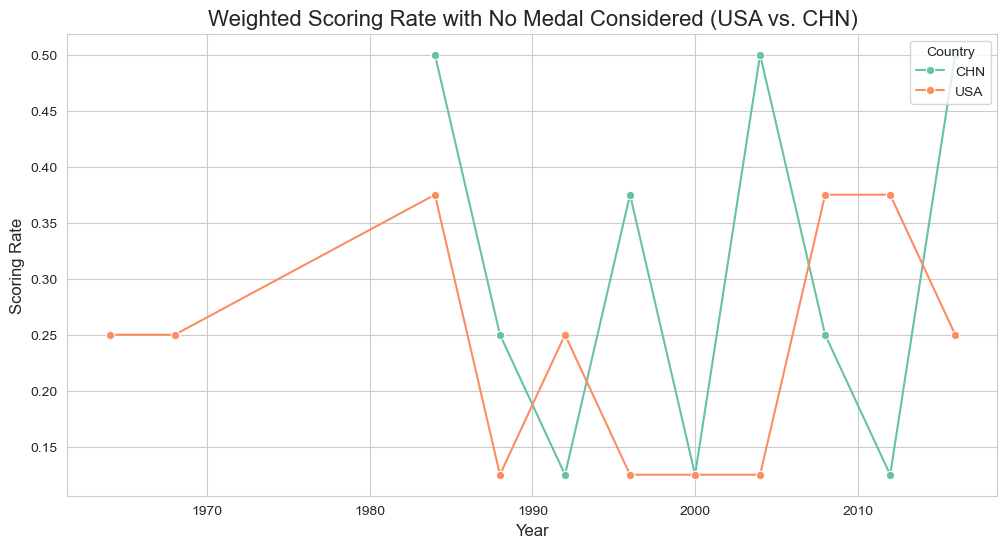

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 筛选中国和美国的数据
volleyball_filtered = medal_distribution_volleyball[medal_distribution_volleyball['NOC'].isin(['USA', 'CHN'])]

# 绘制得分率变化图
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=volleyball_filtered,
    x='Year', y='Scoring Rate', hue='NOC', marker='o', palette='Set2'
)

# 添加标题和标签
plt.title("Weighted Scoring Rate with No Medal Considered (USA vs. CHN)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Scoring Rate", fontsize=12)
plt.legend(title="Country", loc='upper right')
plt.show()


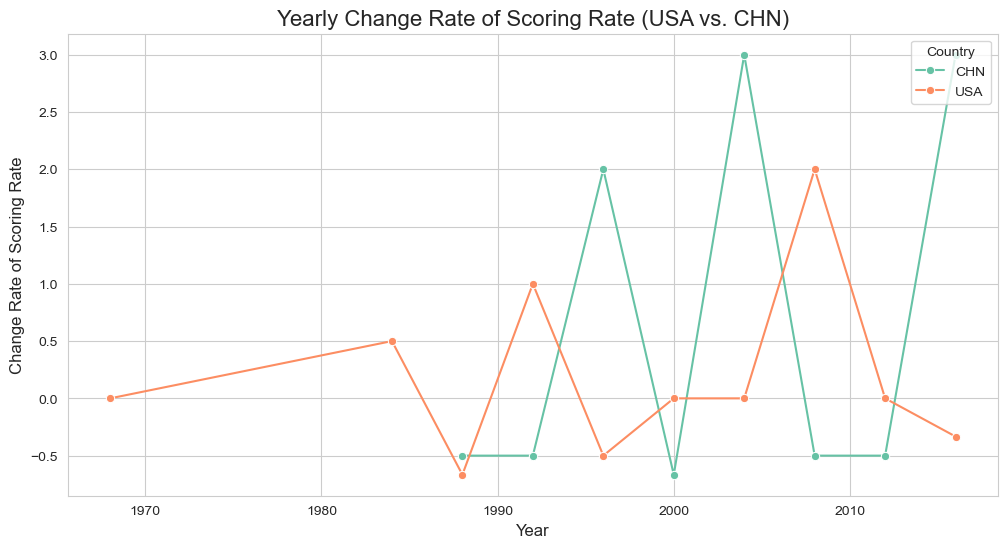

In [23]:
# 1. 计算得分率变化率
medal_distribution_volleyball['Scoring Rate Change'] = medal_distribution_volleyball.groupby('NOC')['Scoring Rate'].pct_change()

# 2. 筛选数据，查看得分率变化率
change_rate_data = medal_distribution_volleyball[['Year', 'NOC', 'Scoring Rate Change']]

# 3. 可视化得分率变化率
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=change_rate_data,
    x='Year', y='Scoring Rate Change', hue='NOC', marker='o', palette='Set2'
)

# 添加标题和标签
plt.title("Yearly Change Rate of Scoring Rate (USA vs. CHN)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Change Rate of Scoring Rate", fontsize=12)
plt.legend(title="Country", loc='upper right')
plt.show()


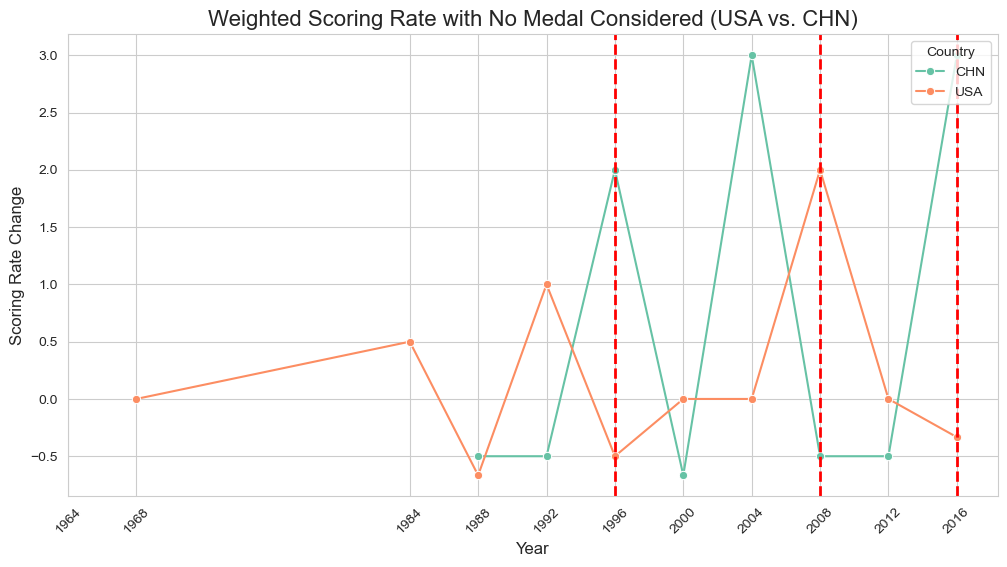

In [24]:
# 绘制得分率变化图
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=medal_distribution_volleyball,
    x='Year', y='Scoring Rate Change', hue='NOC', marker='o', palette='Set2'
)

# 为 Lang_Ping_Era 的年份添加红色竖线
langping_years = medal_distribution_volleyball[medal_distribution_volleyball['Lang_Ping_Era'] == 'Lang_Ping_Era']['Year']
for year in langping_years:
    plt.axvline(x=year, color='red', linestyle='--', linewidth=2)  # 红色虚线

# 设置标题和标签
plt.title("Weighted Scoring Rate with No Medal Considered (USA vs. CHN)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Scoring Rate Change", fontsize=12)
plt.legend(title="Country", loc='upper right')

# 使得横坐标Year的显示间隔与Year一致
plt.xticks(ticks=medal_distribution_volleyball['Year'].unique(), rotation=45)

plt.show()

In [85]:
yearly_summary

,NOC,Year,Athletes_Count,Sports_Count,Gold,Silver,Bronze,Total_Medals,Is_Host,Total Events,Total Disciplines,Total Sports,sports coverage,Gold winning rate,Silver winning rate,Bronze winning rate,Medal winning rate
0,AFG,1936,16,2,0,0,0,0,False,129.0,25.0,19.0,0.105263,0.000000,0.000000,0.0,0.000000
1,AFG,1948,25,2,0,0,0,0,False,136.0,23.0,17.0,0.117647,0.000000,0.000000,0.0,0.000000
2,AFG,1956,12,1,0,0,0,0,False,151.0,23.0,17.0,0.058824,0.000000,0.000000,0.0,0.000000
3,AFG,1960,16,2,0,0,0,0,False,150.0,23.0,17.0,0.117647,0.000000,0.000000,0.0,0.000000
4,AFG,1964,8,1,0,0,0,0,False,163.0,25.0,19.0,0.052632,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,ZIM,2008,16,6,1,3,0,4,False,302.0,42.0,27.0,0.222222,0.003311,0.009934,0.0,0.004415
3218,ZIM,2012,9,4,0,0,0,0,False,302.0,40.0,26.0,0.153846,0.000000,0.000000,0.0,0.000000
3219,ZIM,2016,31,7,0,0,0,0,False,306.0,42.0,28.0,0.250000,0.000000,0.000000,0.0,0.000000
3220,ZIM,2020,5,4,0,0,0,0,False,339.0,50.0,33.0,0.121212,0.000000,0.000000,0.0,0.000000


In [70]:
medal_distribution_volleyball

Medal,NOC,Year,Gold,Silver,Bronze,No medal,Total Medals,Lang_Ping_Era,Weighted Score,Scoring Rate,Scoring Rate Change
0,CHN,1984,1,0,0,0,1,Non_Era,4,0.500,NaN
1,CHN,1988,0,0,1,0,1,Non_Era,2,0.250,-0.500000
2,CHN,1992,0,0,0,1,0,Non_Era,1,0.125,-0.500000
3,CHN,1996,0,1,0,0,1,Lang_Ping_Era,3,0.375,2.000000
4,CHN,2000,0,0,0,1,0,Non_Era,1,0.125,-0.666667
5,CHN,2004,1,0,0,0,1,Non_Era,4,0.500,3.000000
6,CHN,2008,0,0,1,0,1,Non_Era,2,0.250,-0.500000
7,CHN,2012,0,0,0,1,0,Non_Era,1,0.125,-0.500000
8,CHN,2016,1,0,0,0,1,Lang_Ping_Era,4,0.500,3.000000
9,USA,1964,0,0,0,1,0,Non_Era,1,0.250,NaN


In [72]:
merged_medal_summary=merged_medal_summary.drop_duplicates(subset=['Year', 'NOC'])

,Year,NOC,Event,Bronze,Gold,No medal,Silver,GDP,GDP per,pop_total,pop_age
0,1896,AUS,"Athletics Men's 1,500 metres",0,1,0,0,NaN,NaN,NaN,NaN
5,1896,AUT,"Cycling Men's 10,000 metres",1,0,0,0,NaN,NaN,NaN,NaN
13,1896,DEN,Athletics Men's 100 metres,0,0,1,0,NaN,NaN,NaN,NaN
25,1896,FRA,"Athletics Men's 1,500 metres",1,0,0,0,NaN,NaN,NaN,NaN
43,1896,GBR,Athletics Men's 100 metres,0,0,1,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
111448,2024,VIE,10m Air Pistol Women,0,0,1,0,NaN,NaN,NaN,NaN
111467,2024,VIN,Men's 50m Freestyle,0,0,1,0,NaN,NaN,NaN,NaN
111471,2024,YEM,10m Air Pistol Women,0,0,1,0,NaN,NaN,NaN,NaN
111475,2024,ZAM,Men -60 kg,0,0,1,0,NaN,NaN,NaN,NaN


In [148]:
# 假设 yearly_summary 包含 'IS_HOST', 'Medal Rate', 'Sport_coverage' 以及 'Year' 和 'NOC' 列
# 合并 yearly_summary 和 medal_distribution_volleyball
merged_df_volleyball = pd.merge(
    medal_distribution_volleyball,
    yearly_summary[['Year', 'NOC', 'Is_Host', 'Medal winning rate', 'sports coverage']],  # 从 yearly_summary 选择需要的列
    on=['Year', 'NOC'],  # 按 'Year' 和 'NOC' 合并
    how='left'  # 保留 medal_distribution_volleyball 中所有行，左连接
)
merged_df_volleyball = pd.merge(
    merged_df_volleyball,
    merged_medal_summary[['Year','NOC','GDP','GDP per','pop_total','pop_age']],
    on=['Year', 'NOC'], how='left' 
)
# 查看合并后的数据
print(merged_df_volleyball.head())

### 双重差分

In [94]:
import statsmodels.formula.api as smf
import statsmodels.api as sm  # 导入 statsmodels

In [200]:
merged_df_volleyball['Treatment'] = merged_df_volleyball['NOC'].apply(
    lambda x: 1 if x in ['CHN', 'USA'] else 0
)
merged_df_volleyball['Post'] = merged_df_volleyball['Lang_Ping_Era'].apply(
    lambda x: 1 if x == "Lang_Ping_Era" else 0
)
merged_df_volleyball.rename(
    columns={
        'Scoring Rate':'Scoring_Rate',
        'Scoring Rate Change': 'Scoring_Rate_Change',
        'Medal winning rate': 'Medal_winning_rate',
        'sports coverage': 'sports_coverage',
        'GDP per': 'GDP_per'
    },
    inplace=True
)
# 对相关列进行对数转换，确保变量大于0，避免取对数时出现负无穷
merged_df_volleyball['log_GDP'] = np.log(merged_df_volleyball['GDP'])  # 加1避免0值的对数
merged_df_volleyball['log_GDP_per'] = np.log(merged_df_volleyball['GDP_per'])
merged_df_volleyball['log_pop_total'] = np.log(merged_df_volleyball['pop_total'])
merged_df_volleyball['log_pop_age'] = np.log(merged_df_volleyball['pop_age'])


In [250]:
# 双重差分模型
did_model = smf.ols(
    'Scoring_Rate_Change~Post * Treatment + Is_Host + Medal_winning_rate + sports_coverage + GDP + GDP_per+pop_total+pop_age +log_GDP+log_GDP_per+log_pop_total+log_pop_age',
    data=merged_df_volleyball
).fit()

# 输出结果
print(did_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Scoring_Rate_Change   R-squared:                       0.671
Model:                             OLS   Adj. R-squared:                  0.378
Method:                  Least Squares   F-statistic:                     2.291
Date:                 Mon, 27 Jan 2025   Prob (F-statistic):              0.119
Time:                         19:54:33   Log-Likelihood:                -19.030
No. Observations:                   18   AIC:                             56.06
Df Residuals:                        9   BIC:                             64.07
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6

C:\Users\zhaochenghao\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [204]:
merged_df_volleyball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOC                  20 non-null     object 
 1   Year                 20 non-null     int64  
 2   Gold                 20 non-null     int64  
 3   Silver               20 non-null     int64  
 4   Bronze               20 non-null     int64  
 5   No medal             20 non-null     int64  
 6   Total Medals         20 non-null     int64  
 7   Lang_Ping_Era        20 non-null     object 
 8   Weighted Score       20 non-null     int64  
 9   Scoring_Rate         20 non-null     float64
 10  Scoring_Rate_Change  18 non-null     float64
 11  Is_Host              20 non-null     bool   
 12  Medal_winning_rate   20 non-null     float64
 13  sports_coverage      20 non-null     float64
 14  GDP                  20 non-null     float64
 15  GDP_per              20 non-null     float

In [205]:
import pandas as pd
import statsmodels.formula.api as smf

# 假设 merged_df_volleyball 已经准备好，包含 'Year', 'NOC', 'Scoring_Rate_Change' 和其他控制变量

# 定义奥运周期
olympic_years = [1996, 2008, 2016]

# 创建相对年份变量（每个奥运周期）
for olympic_year in olympic_years:
    merged_df_volleyball[f'Relative_Year_{olympic_year}'] = merged_df_volleyball['Year'] - olympic_year

# 创建动态的交互项（例如Post * Treatment）以及每个奥运周期的交互项
for olympic_year in olympic_years:
    merged_df_volleyball[f'Post_Treatment_{olympic_year}'] = merged_df_volleyball['Post'] * merged_df_volleyball['Treatment'] * merged_df_volleyball[f'Relative_Year_{olympic_year}']

# 检查结果
merged_df_volleyball.head()


,NOC,Year,Gold,Silver,Bronze,No medal,Total Medals,Lang_Ping_Era,Weighted Score,Scoring_Rate,...,Post_Treatment_1996,Post_Treatment_2008,Post_Treatment_2016,Post1,Post2,Post3,log_GDP,log_GDP_per,log_pop_total,log_pop_age
0,CHN,1984,1,0,0,0,1,Non_Era,4,0.500,...,0,0,0,0,0,0,26.283744,5.524313,20.759429,4.143375
1,CHN,1988,0,0,1,0,1,Non_Era,2,0.250,...,0,0,0,0,0,0,26.467403,5.647345,20.820057,4.182841
2,CHN,1992,0,0,0,1,0,Non_Era,1,0.125,...,0,0,0,0,0,0,26.779853,5.903891,20.875961,4.189980
3,CHN,1996,0,1,0,0,1,Lang_Ping_Era,3,0.375,...,0,-12,-20,0,0,0,27.484548,6.564442,20.920106,4.202061
4,CHN,2000,0,0,0,1,0,Non_Era,1,0.125,...,0,0,0,0,0,0,27.822740,6.866267,20.956475,4.225934


In [206]:
merged_df_volleyball

,NOC,Year,Gold,Silver,Bronze,No medal,Total Medals,Lang_Ping_Era,Weighted Score,Scoring_Rate,...,Post_Treatment_1996,Post_Treatment_2008,Post_Treatment_2016,Post1,Post2,Post3,log_GDP,log_GDP_per,log_pop_total,log_pop_age
0,CHN,1984,1,0,0,0,1,Non_Era,4,0.500,...,0,0,0,0,0,0,26.283744,5.524313,20.759429,4.143375
1,CHN,1988,0,0,1,0,1,Non_Era,2,0.250,...,0,0,0,0,0,0,26.467403,5.647345,20.820057,4.182841
2,CHN,1992,0,0,0,1,0,Non_Era,1,0.125,...,0,0,0,0,0,0,26.779853,5.903891,20.875961,4.189980
3,CHN,1996,0,1,0,0,1,Lang_Ping_Era,3,0.375,...,0,-12,-20,0,0,0,27.484548,6.564442,20.920106,4.202061
4,CHN,2000,0,0,0,1,0,Non_Era,1,0.125,...,0,0,0,0,0,0,27.822740,6.866267,20.956475,4.225934
5,CHN,2004,1,0,0,0,1,Non_Era,4,0.500,...,0,0,0,0,0,0,28.301590,7.318982,20.982606,4.263754
6,CHN,2008,0,0,1,0,1,Non_Era,2,0.250,...,0,0,0,1,0,0,29.155846,8.151428,21.004418,4.287413
7,CHN,2012,0,0,0,1,0,Non_Era,1,0.125,...,0,0,0,0,1,0,29.774867,8.748397,21.026469,4.285150
8,CHN,2016,1,0,0,0,1,Lang_Ping_Era,4,0.500,...,20,8,0,0,0,1,30.049904,8.998927,21.050978,4.265555
9,USA,1964,0,0,0,1,0,Non_Era,1,0.250,...,0,0,0,0,0,0,27.251436,8.179008,19.072428,4.093079


In [207]:
# 动态DID模型：分析不同相对年份的影响
dynamic_did_model = smf.ols(
    'Scoring_Rate_Change ~ Post * Treatment + Is_Host + Medal_winning_rate + sports_coverage + GDP + GDP_per+pop_total + pop_age + log_GDP + log_GDP_per + log_pop_total + log_pop_age +' +
    ' + '.join([f'Post_Treatment_{olympic_year}' for olympic_year in olympic_years]),
    data=merged_df_volleyball
).fit()

# 输出动态DID模型结果
print(dynamic_did_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Scoring_Rate_Change   R-squared:                       0.712
Model:                             OLS   Adj. R-squared:                  0.389
Method:                  Least Squares   F-statistic:                     2.201
Date:                 Mon, 27 Jan 2025   Prob (F-statistic):              0.140
Time:                         19:09:46   Log-Likelihood:                -17.814
No. Observations:                   18   AIC:                             55.63
Df Residuals:                        8   BIC:                             64.53
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               

C:\Users\zhaochenghao\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


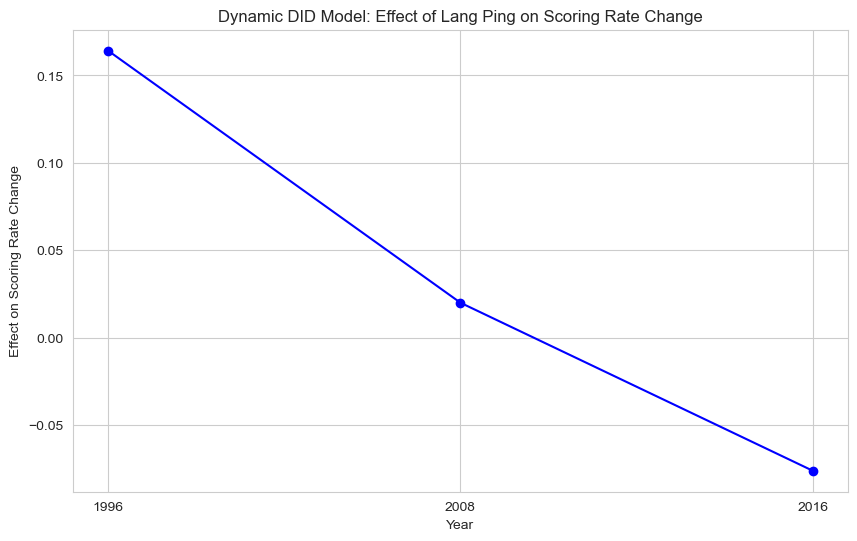

In [208]:
# 提取DID模型和动态DID模型的系数
coef_did = did_model.params
coef_dynamic_did = dynamic_did_model.params

# 设置时间点（假设横轴为年份，纵轴为得分变化）
years = ['1996', '2008', '2016']

# 对应的系数值（从动态DID模型中提取）
post_treatment_1996 = coef_dynamic_did['Post_Treatment_1996']
post_treatment_2008 = coef_dynamic_did['Post_Treatment_2008']
post_treatment_2016 = coef_dynamic_did['Post_Treatment_2016']

# 绘制动态DID模型结果（不同年份的郎平效应）
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(years, [post_treatment_1996, post_treatment_2008, post_treatment_2016], marker='o', linestyle='-', color='b')
ax.set_xlabel('Year')
ax.set_ylabel('Effect on Scoring Rate Change')
ax.set_title('Dynamic DID Model: Effect of Lang Ping on Scoring Rate Change')
plt.grid(True)
plt.show()


In [209]:
merged_df_volleyball.to_csv('merged_df_volleyball.csv')

## 2.达米拉诺家族

In [210]:
merged_medal_summary

,Year,NOC,Event,Bronze,Gold,No medal,Silver,GDP,GDP per,pop_total,pop_age
0,1896,AUS,"Athletics Men's 1,500 metres",0,1,0,0,NaN,NaN,NaN,NaN
5,1896,AUT,"Cycling Men's 10,000 metres",1,0,0,0,NaN,NaN,NaN,NaN
13,1896,DEN,Athletics Men's 100 metres,0,0,1,0,NaN,NaN,NaN,NaN
25,1896,FRA,"Athletics Men's 1,500 metres",1,0,0,0,NaN,NaN,NaN,NaN
43,1896,GBR,Athletics Men's 100 metres,0,0,1,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
111448,2024,VIE,10m Air Pistol Women,0,0,1,0,NaN,NaN,NaN,NaN
111467,2024,VIN,Men's 50m Freestyle,0,0,1,0,NaN,NaN,NaN,NaN
111471,2024,YEM,10m Air Pistol Women,0,0,1,0,NaN,NaN,NaN,NaN
111475,2024,ZAM,Men -60 kg,0,0,1,0,NaN,NaN,NaN,NaN


In [211]:
yearly_detailed_walk = medal_summary_pivot[medal_summary_pivot['Event'].str.contains("Walk", case=False, na=False)]


#### 将GER和GDR何为一个地区

In [212]:
relevant_data_wr = yearly_detailed_walk[
    (yearly_detailed_walk['NOC'].isin(['ITA','CHN'])) 
]
print(relevant_data_wr)

Medal   Year  NOC                               Event  Bronze  Gold  No medal  \
2516    1912  ITA  Athletics Men's 10 kilometres Walk       1     0         0   
3505    1920  ITA  Athletics Men's 10 kilometres Walk       0     1         1   
3511    1920  ITA   Athletics Men's 3,000 metres Walk       0     1         1   
4972    1924  ITA  Athletics Men's 10 kilometres Walk       0     1         1   
7927    1932  ITA  Athletics Men's 50 kilometres Walk       1     0         1   
...      ...  ...                                 ...     ...   ...       ...   
106187  2024  CHN                Men's 20km Race Walk       0     0         1   
106289  2024  CHN              Women's 20km Race Walk       0     1         1   
108407  2024  ITA      Marathon Race Walk Relay Mixed       0     0         1   
108432  2024  ITA                Men's 20km Race Walk       0     0         1   
108531  2024  ITA              Women's 20km Race Walk       0     0         1   

Medal   Silver  
2516      

In [213]:
# 按国家和年份汇总奖牌数据
medal_distribution_walk = relevant_data_wr.groupby(['NOC', 'Year'])[['Gold', 'Silver', 'Bronze','No medal']].sum().reset_index()

# 计算奖牌总数
medal_distribution_walk['Total Medals'] = (
    medal_distribution_walk['Gold'] + medal_distribution_walk['Silver'] + medal_distribution_walk['Bronze']
)

# 查看结果
print(medal_distribution_walk)

Medal  NOC  Year  Gold  Silver  Bronze  No medal  Total Medals
0      CHN  1936     0       0       0         1             0
1      CHN  1984     0       0       0         2             0
2      CHN  1988     0       0       0         2             0
3      CHN  1992     1       0       1         2             2
4      CHN  1996     0       0       1         3             1
5      CHN  2000     1       0       0         3             1
6      CHN  2004     0       0       0         3             0
7      CHN  2008     0       0       0         3             0
8      CHN  2012     1       0       3         3             4
9      CHN  2016     2       1       1         3             4
10     CHN  2020     0       0       1         3             1
11     CHN  2024     1       0       0         3             1
12     ITA  1912     0       0       1         0             1
13     ITA  1920     2       0       0         2             2
14     ITA  1924     1       0       0         1       

In [232]:
# 添加郎平执教标记
medal_distribution_walk['wr_Era'] = medal_distribution_walk.apply(
    lambda row: 'wr_Era' if 
    (row['NOC'] == 'CHN' and row['Year'] in [2008]) 
    else 'Non_Era', 
    axis=1
)

# 查看数据
print(medal_distribution_walk)

Medal  NOC  Year  Gold  Silver  Bronze  No medal  Total Medals   wr_Era  \
0      CHN  1936     0       0       0         1             0  Non_Era   
1      CHN  1984     0       0       0         2             0  Non_Era   
2      CHN  1988     0       0       0         2             0  Non_Era   
3      CHN  1992     1       0       1         2             2  Non_Era   
4      CHN  1996     0       0       1         3             1  Non_Era   
5      CHN  2000     1       0       0         3             1  Non_Era   
6      CHN  2004     0       0       0         3             0  Non_Era   
7      CHN  2008     0       0       0         3             0   wr_Era   
8      CHN  2012     1       0       3         3             4  Non_Era   
9      CHN  2016     2       1       1         3             4  Non_Era   
10     CHN  2020     0       0       1         3             1  Non_Era   
11     CHN  2024     1       0       0         3             1  Non_Era   
12     ITA  1912     0   

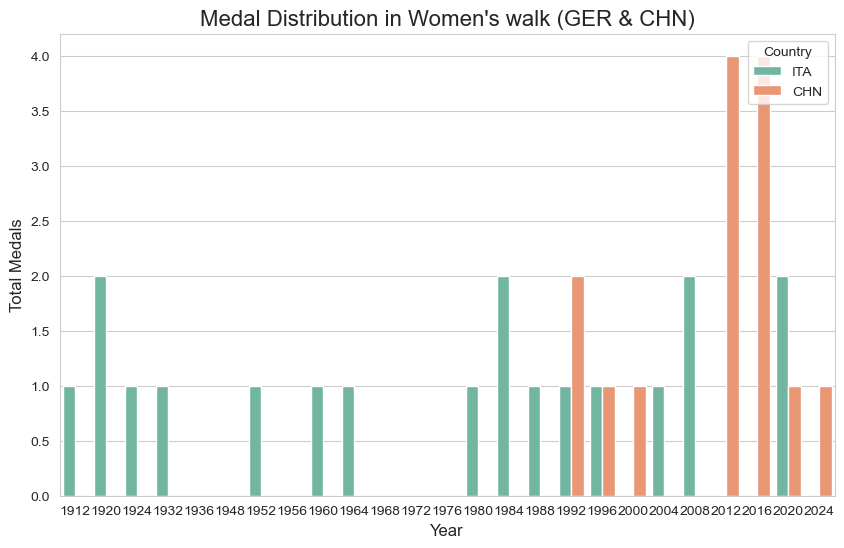

Medal  Year  NOC  Gold  Silver  Bronze  No medal  Weighted Score  Scoring Rate
0      1936  CHN     0       0       0         1               1      0.125000
1      1984  CHN     0       0       0         2               2      0.083333
2      1988  CHN     0       0       0         2               2      0.100000
3      1992  CHN     1       0       1         2               8      0.250000
4      1996  CHN     0       0       1         3               5      0.156250
5      2000  CHN     1       0       0         3               7      0.250000
6      2004  CHN     0       0       0         3               3      0.107143
7      2008  CHN     0       0       0         3               3      0.107143
8      2012  CHN     1       0       3         3              13      0.325000
9      2016  CHN     2       1       1         3              16      0.400000
10     2020  CHN     0       0       1         3               5      0.138889
11     2024  CHN     1       0       0         3    

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制对比图
plt.figure(figsize=(10, 6))
sns.barplot(data=medal_distribution_walk, x='Year', y='Total Medals', hue='NOC', palette='Set2')

# 添加标题和标签
plt.title("Medal Distribution in Women's walk (ITA & CHN)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Medals", fontsize=12)
plt.legend(title="Country", loc='upper right')
plt.show()
####计算得分率和变化率
# 假设 medal_distribution_walk 数据有如下列：Year, NOC, Gold, Silver, Bronze, No_Medal

# 1. 定义奖牌权重
gold_weight = 4
silver_weight = 3
bronze_weight = 2
no_medal_weight = 1

# 2. 计算加权得分
medal_distribution_walk['Weighted Score'] = (
    gold_weight * medal_distribution_walk['Gold'] +
    silver_weight * medal_distribution_walk['Silver'] +
    bronze_weight * medal_distribution_walk['Bronze'] +
    no_medal_weight * medal_distribution_walk['No medal']
)

# 3. 计算每年的最大可能得分
# 假设每场比赛最多颁发 1 金、1 银、1 铜，并且剩余为 no_medal
max_possible_score_per_year = (
    medal_distribution_walk.groupby('Year')[
        ['Gold', 'Silver', 'Bronze', 'No medal']
    ].sum().sum(axis=1) * gold_weight
).to_dict()

# 4. 添加得分率
medal_distribution_walk['Scoring Rate'] = medal_distribution_walk.apply(
    lambda row: row['Weighted Score'] / max_possible_score_per_year[row['Year']],
    axis=1
)

# 5. 查看结果
print(medal_distribution_walk[['Year', 'NOC', 'Gold', 'Silver', 'Bronze', 'No medal', 'Weighted Score', 'Scoring Rate']])

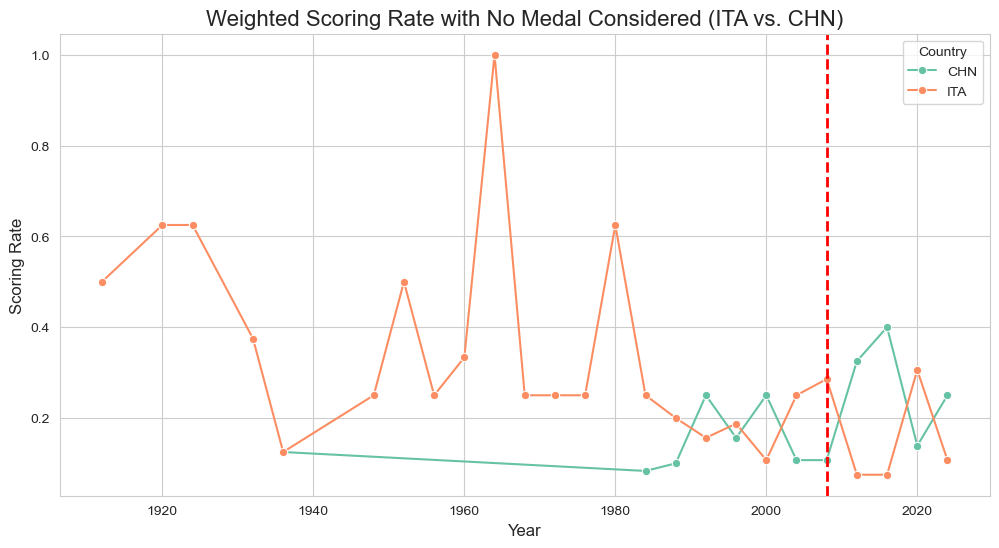

In [234]:
# 筛选中国和美国的数据
walk_filtered = medal_distribution_walk[medal_distribution_walk['NOC'].isin(['ITA', 'CHN'])]

# 绘制得分率变化图
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=walk_filtered,
    x='Year', y='Scoring Rate', hue='NOC', marker='o', palette='Set2'
)
# 为 wr_Era 的年份添加红色竖线
wr_years = medal_distribution_walk[medal_distribution_walk['wr_Era'] == 'wr_Era']['Year']
for year in wr_years:
    plt.axvline(x=year, color='red', linestyle='--', linewidth=2)  # 红色虚线
# 添加标题和标签
plt.title("Weighted Scoring Rate with No Medal Considered (ITA vs. CHN)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Scoring Rate", fontsize=12)
plt.legend(title="Country", loc='upper right')
plt.show()


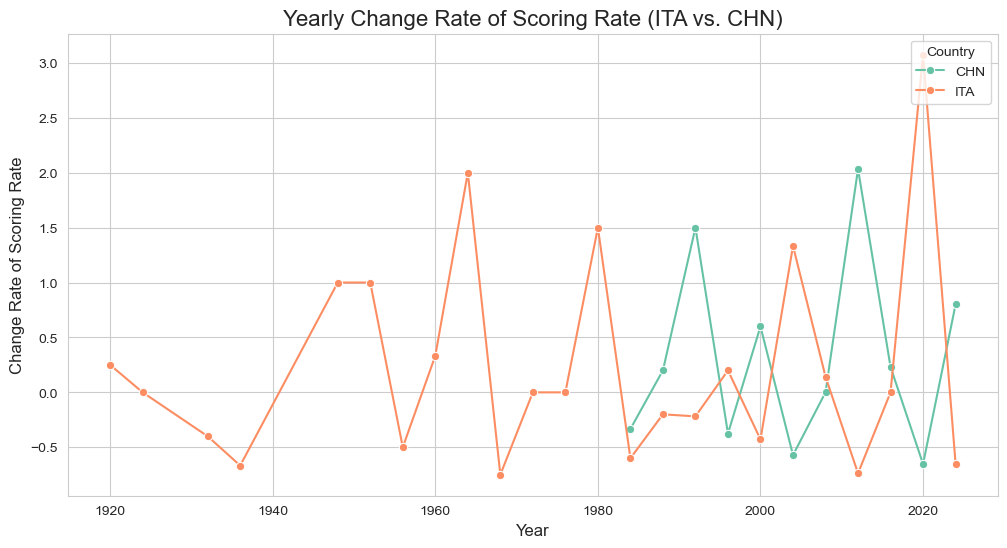

In [217]:
# 1. 计算得分率变化率
medal_distribution_walk['Scoring Rate Change'] = medal_distribution_walk.groupby('NOC')[
    'Scoring Rate'].pct_change()

# 2. 筛选数据，查看得分率变化率
change_rate_data = medal_distribution_walk[['Year', 'NOC', 'Scoring Rate Change']]

# 3. 可视化得分率变化率
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=change_rate_data,
    x='Year', y='Scoring Rate Change', hue='NOC', marker='o', palette='Set2'
)

# 添加标题和标签
plt.title("Yearly Change Rate of Scoring Rate (ITA vs. CHN)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Change Rate of Scoring Rate", fontsize=12)
plt.legend(title="Country", loc='upper right')
plt.show()


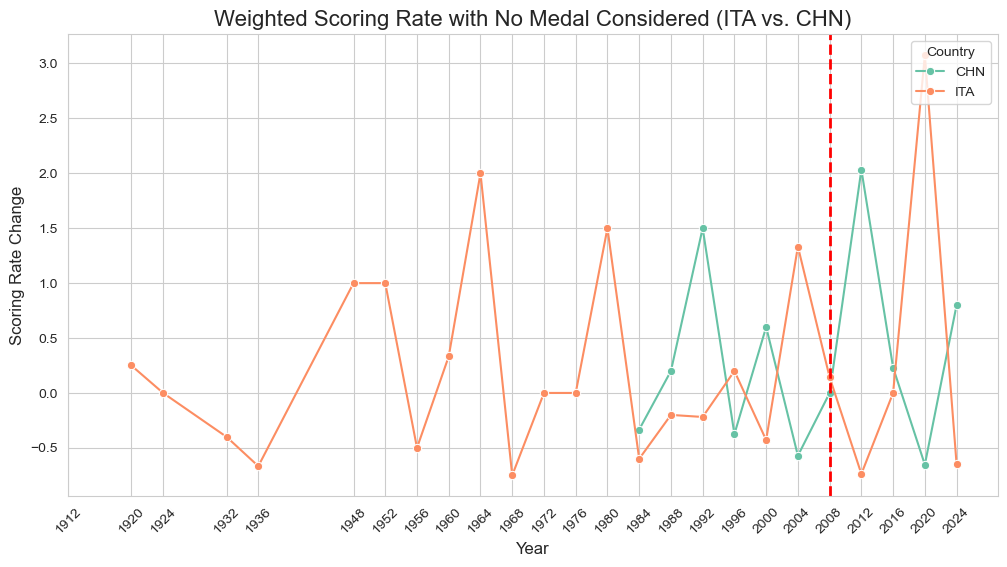

In [233]:
# 绘制得分率变化图
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=medal_distribution_walk,
    x='Year', y='Scoring Rate Change', hue='NOC', marker='o', palette='Set2'
)

# 为 Lang_Ping_Era 的年份添加红色竖线
wr_years = medal_distribution_walk[medal_distribution_walk['wr_Era'] == 'wr_Era']['Year']
for year in wr_years:
    plt.axvline(x=year, color='red', linestyle='--', linewidth=2)  # 红色虚线

# 设置标题和标签
plt.title("Weighted Scoring Rate with No Medal Considered (ITA vs. CHN)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Scoring Rate Change", fontsize=12)
plt.legend(title="Country", loc='upper right')

# 使得横坐标Year的显示间隔与Year一致
plt.xticks(ticks=medal_distribution_walk['Year'].unique(), rotation=45)

plt.show()

In [ ]:
merged_df_walk = pd.merge(
    medal_distribution_walk,
    yearly_summary[['Year', 'NOC', 'Is_Host', 'Medal winning rate', 'sports coverage']],  # 从 yearly_summary 选择需要的列
    on=['Year', 'NOC'],  # 按 'Year' 和 'NOC' 合并
    how='left'  # 保留 medal_distribution_volleyball 中所有行，左连接
)
merged_df_walk = pd.merge(
    merged_df_walk,
    merged_medal_summary[['Year','NOC','GDP','GDP per','pop_total','pop_age']],
    on=['Year', 'NOC'], how='left' 
)

In [226]:
# 查看合并后的数据
print(merged_df_walk.head())

   NOC  Year  Gold  Silver  Bronze  No medal  Total Medals   wr_Era  \
0  CHN  1936     0       0       0         1             0  Non_Era   
1  CHN  1984     0       0       0         2             0  Non_Era   
2  CHN  1988     0       0       0         2             0  Non_Era   
3  CHN  1992     1       0       1         2             2  Non_Era   
4  CHN  1996     0       0       1         3             1  Non_Era   

   Weighted Score  Scoring_Rate  ...           GDP     GDP_per     pop_total  \
0               1      0.125000  ...           NaN         NaN           NaN   
1               2      0.083333  ...  2.599470e+11  250.713969  1.036825e+09   
2               2      0.100000  ...  3.123540e+11  283.537695  1.101630e+09   
3               8      0.250000  ...  4.269160e+11  366.460692  1.164970e+09   
4               5      0.156250  ...  8.637490e+11  709.415888  1.217550e+09   

     pop_age  Treatment  Post    log_GDP  log_GDP_per  log_pop_total  \
0        NaN        

In [229]:
merged_df_walk['Treatment'] = merged_df_walk['NOC'].apply(
    lambda x: 1 if x in ['CHN', 'ITA'] else 0
)
merged_df_walk['Post'] = merged_df_walk['wr_Era'].apply(
    lambda x: 1 if x == "wr_Era" else 0
)
merged_df_walk.rename(
    columns={
        'Scoring Rate':'Scoring_Rate',
        'Scoring Rate Change': 'Scoring_Rate_Change',
        'Medal winning rate': 'Medal_winning_rate',
        'sports coverage': 'sports_coverage',
        'GDP per': 'GDP_per'
    },
    inplace=True
)

In [230]:
# 对相关列进行对数转换，确保变量大于0，避免取对数时出现负无穷
merged_df_walk['log_GDP'] = np.log(merged_df_walk['GDP'])  # 加1避免0值的对数
merged_df_walk['log_GDP_per'] = np.log(merged_df_walk['GDP_per'])
merged_df_walk['log_pop_total'] = np.log(merged_df_walk['pop_total'])
merged_df_walk['log_pop_age'] = np.log(merged_df_walk['pop_age'])

In [242]:
# 双重差分模型
did_model_walk = smf.ols(
    'Scoring_Rate_Change~Post * Treatment + Is_Host + Medal_winning_rate + sports_coverage + GDP + GDP_per+pop_total+pop_age +log_GDP+log_GDP_per+log_pop_total+log_pop_age',
    data=merged_df_walk
).fit()

# 输出结果
print(did_model_walk.summary())

                             OLS Regression Results                            
Dep. Variable:     Scoring_Rate_Change   R-squared:                       0.384
Model:                             OLS   Adj. R-squared:                  0.077
Method:                  Least Squares   F-statistic:                     1.249
Date:                 Mon, 27 Jan 2025   Prob (F-statistic):              0.334
Time:                         19:46:14   Log-Likelihood:                -29.204
No. Observations:                   25   AIC:                             76.41
Df Residuals:                       16   BIC:                             87.38
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.2

In [239]:
import pandas as pd
import statsmodels.formula.api as smf
# 定义奥运周期
olympic_years = [2008,2012,2016,2020,2024]

# 创建相对年份变量（每个奥运周期）
for olympic_year in olympic_years:
    merged_df_walk[f'Relative_Year_{olympic_year}'] = merged_df_walk['Year'] - olympic_year

# 创建动态的交互项（例如Post * Treatment）以及每个奥运周期的交互项
for olympic_year in olympic_years:
    merged_df_walk[f'Post_Treatment_{olympic_year}'] = merged_df_walk['Post'] * merged_df_walk['Treatment'] * merged_df_walk[f'Relative_Year_{olympic_year}']

# 检查结果
merged_df_walk.head()

,NOC,Year,Gold,Silver,Bronze,No medal,Total Medals,wr_Era,Weighted Score,Scoring_Rate,...,Relative_Year_2008,Post_Treatment_2008,Relative_Year_2012,Relative_Year_2016,Relative_Year_2020,Relative_Year_2024,Post_Treatment_2012,Post_Treatment_2016,Post_Treatment_2020,Post_Treatment_2024
0,CHN,1936,0,0,0,1,0,Non_Era,1,0.125000,...,-72,0,-76,-80,-84,-88,0,0,0,0
1,CHN,1984,0,0,0,2,0,Non_Era,2,0.083333,...,-24,0,-28,-32,-36,-40,0,0,0,0
2,CHN,1988,0,0,0,2,0,Non_Era,2,0.100000,...,-20,0,-24,-28,-32,-36,0,0,0,0
3,CHN,1992,1,0,1,2,2,Non_Era,8,0.250000,...,-16,0,-20,-24,-28,-32,0,0,0,0
4,CHN,1996,0,0,1,3,1,Non_Era,5,0.156250,...,-12,0,-16,-20,-24,-28,0,0,0,0


In [246]:
# 动态DID模型：分析不同相对年份的影响
dynamic_did_model_walk = smf.ols(
    'Scoring_Rate_Change ~ Post * Treatment + Is_Host + Medal_winning_rate + sports_coverage + GDP + GDP_per+pop_total + pop_age + log_GDP + log_GDP_per + log_pop_total + log_pop_age +' +
    ' + '.join([f'Post_Treatment_{olympic_year}' for olympic_year in olympic_years]),
    data=merged_df_walk
).fit()

# 输出动态DID模型结果
print(dynamic_did_model_walk.summary())

                             OLS Regression Results                            
Dep. Variable:     Scoring_Rate_Change   R-squared:                       0.403
Model:                             OLS   Adj. R-squared:                  0.045
Method:                  Least Squares   F-statistic:                     1.126
Date:                 Mon, 27 Jan 2025   Prob (F-statistic):              0.403
Time:                         19:50:41   Log-Likelihood:                -28.814
No. Observations:                   25   AIC:                             77.63
Df Residuals:                       15   BIC:                             89.82
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               

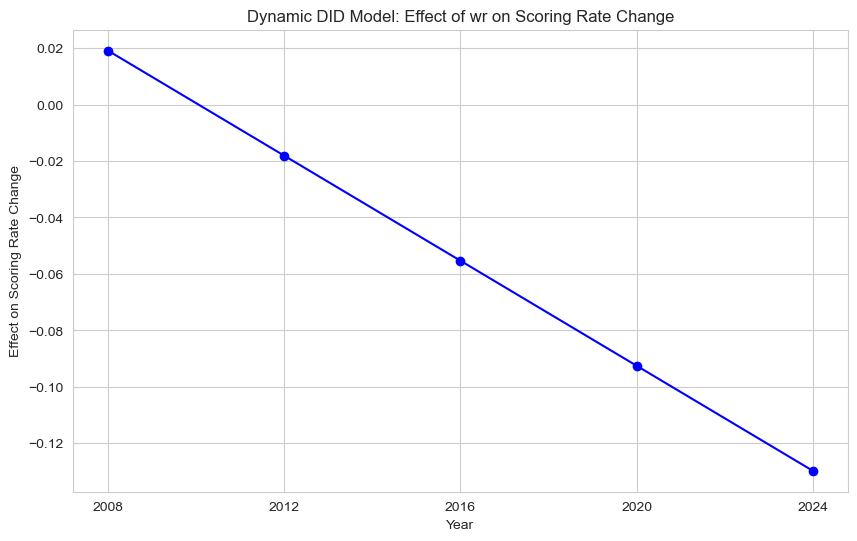

In [248]:
# 提取DID模型和动态DID模型的系数
coef_did = did_model_walk.params
coef_dynamic_did = dynamic_did_model_walk.params

# 设置时间点（假设横轴为年份，纵轴为得分变化）
years = ['2008', '2012', '2016', '2020','2024']

# 对应的系数值（从动态DID模型中提取）
post_treatment_2008 = coef_dynamic_did['Post_Treatment_2008']
post_treatment_2012 = coef_dynamic_did['Post_Treatment_2012']
post_treatment_2016 = coef_dynamic_did['Post_Treatment_2016']
post_treatment_2020 = coef_dynamic_did['Post_Treatment_2020']
post_treatment_2024 = coef_dynamic_did['Post_Treatment_2024']

# 绘制动态DID模型结果（不同年份的郎平效应）
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(years, [post_treatment_2008, post_treatment_2012, post_treatment_2016,post_treatment_2020, post_treatment_2024], marker='o', linestyle='-', color='b')
ax.set_xlabel('Year')
ax.set_ylabel('Effect on Scoring Rate Change')
ax.set_title('Dynamic DID Model: Effect of wr on Scoring Rate Change')
plt.grid(True)
plt.show()

In [249]:
merged_df_walk.to_csv('merged_df_walk.csv')